# Computational Linguistics: Phrase Modeling

When examining a corpora of text, like a person's tweets, what can we learn about how and what is expressed in that corpora by examining words and combinations of words? Is there a story that emerges? What patterns emerge or can be confirmed?

Fortunately, we live in an era where famous people frequently use Twitter; and Twitter is good at producing a large number of finite (small) sets of words for us to examine. 

Let's take a look at some tweets from Donald Trump during his presidency. 

In [1]:
## Lets import some libraries form mathplotlib ... its helpful for plotting. 
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [2]:
#All the packages we are using in this project
import nltk, re, pprint
from nltk import word_tokenize
from nltk import FreqDist
import json
import pandas as pd
import csv

All tweets from Donald Trump are stored in the file 'realDonaldTrump_tweets.txt' listed below.

## Text Analysis
For this text analysis we will look at the following:
 - Text [collocations](https://en.wikipedia.org/wiki/Collocation) to find common words that go together
 - Regular expressions to parse out hashtags and high frequency user accounts

In [3]:
file_path = '/dsa/data/all_datasets/linguistic/realDonaldTrump_tweets.txt'


First we use a regular expression to strip away symbols and web links in the tweets

In [4]:
with open(file_path, 'r') as f:
    raw_text = f.read()  # fetching all the tweets together
    print(raw_text)

It was a great honor to have spoken before the countries of the world at the United Nations.
#USAatUNGA#UNGA https://t.co/nPWffjKMSz
God bless the people of Mexico City. We are with you and will be there for you.
As President of the United States of America, I will ALWAYS put #AmericaFirst#UNGA
Full remarks: https://t.co/TTE2PMSbMu
Thehas great strength &amp; patience, but if it is forced to defend itself or its allies, we will have no choice but https://t.co/IgW8Sg6yUB
RT @IvankaTrump: I have long respected India's accomplished and charismatic Foreign Minister @SushmaSwaraj, and it was an honor to meet her
Big day at the United Nations - many good things, and some tricky ones, happening. We have a great team. Big speech at 10:00 A.M.
#USAatUNGA #UNGA https://t.co/MjIJ7HG3eU
We call for the full restoration of democracy and political freedoms in Venezuela, and we want it to happen very, v https://t.co/pbr9DByGcX
It was a great honor to be with President @EmmanuelMacron of France this a

In [5]:
# remove all non-alphanumeric characters  and urls
# \w: alphanumeric charc; ^\w: not alphanumeric
# https.*\b: matches strings that starts with https and ends with 
# \b (\b matches the empty string at the beginning or end of a word)

raw = re.sub(r'[^\w]|https.*\b', ' ', raw_text)
print(raw)


It was a great honor to have spoken before the countries of the world at the United Nations   USAatUNGA UNGA   God bless the people of Mexico City  We are with you and will be there for you  As President of the United States of America  I will ALWAYS put  AmericaFirst UNGA Full remarks    Thehas great strength  amp  patience  but if it is forced to defend itself or its allies  we will have no choice but   RT  IvankaTrump  I have long respected India s accomplished and charismatic Foreign Minister  SushmaSwaraj  and it was an honor to meet her Big day at the United Nations   many good things  and some tricky ones  happening  We have a great team  Big speech at 10 00 A M   USAatUNGA  UNGA   We call for the full restoration of democracy and political freedoms in Venezuela  and we want it to happen very  v   It was a great honor to be with President  EmmanuelMacron of France this afternoon with his delegation  Great bilat   Such an honor to have my good friend  Israel PM  Netanyahu  join u

In [6]:
# let's 
tokens = word_tokenize(raw)
len(tokens)

58615

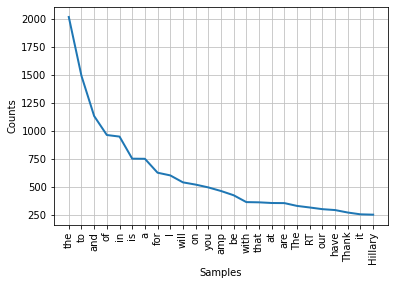

In [7]:
freq_dist = nltk.FreqDist(tokens)

# NLTK is our friend!
freq_dist.plot(25);  # top 25 words.

Let's remove the stop words. 

In [8]:
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = stopwords.words("english")


[nltk_data] Downloading package stopwords to /home/lcmhng/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


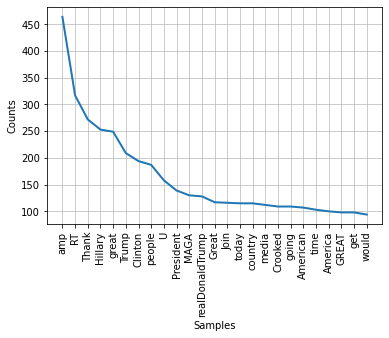

In [9]:
tokens_wo_stopwords = [word for word in tokens if word.lower() not in stop_words]
freq_dist = nltk.FreqDist(tokens_wo_stopwords)
freq_dist.plot(25);  # top 25 words.

Let's extend the stopword list by adding the following words. 

* `amp`: a part of ampersand (&amp;) 
* `RT`: represents retweet
* `U`: not sure

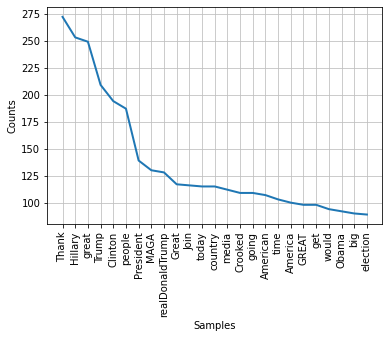

In [10]:
mystop_words = stop_words + ['amp', 'rt', 'u']
tokens_wo_stopwords = [word for word in tokens if word.lower() not in mystop_words]
freq_dist = nltk.FreqDist(tokens_wo_stopwords)
freq_dist.plot(25);  # top 25 words.

# N-grams

N-grams are an examination of sets of co-occuring terms in a corpus.
You will often see bi-gram or tri-gram, an examination of word-pairs or word-triples, respectively.
 * Read more here: https://en.wikipedia.org/wiki/N-gram
 
## First, let's look at bi-grams 

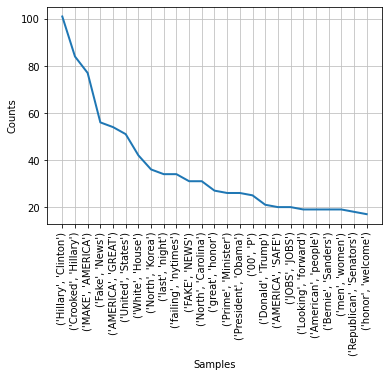

In [11]:
from nltk.util import ngrams

def plot_ngram(tokens, num):
    ngram = ngrams(tokens, num)
    ngram_dist = nltk.FreqDist(ngram)
    ngram_dist.plot(25)

plot_ngram(tokens_wo_stopwords, 2) ##bigram frequency distribution


## ... and now, tri-grams 

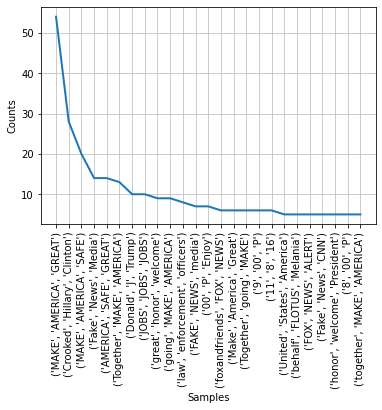

In [12]:
plot_ngram(tokens_wo_stopwords, 3) ##trigram frequency distribution

**Reflecting on the plots above, is this what you expected?**

---
Now let's keep digging with some additional analysis.

In [13]:
print("Unique trump tweet vocab: %i (including capitalized letters)" % len(set(tokens)))
print("Unique trump tweet vocab wo stop words: %i (including capitalized letters)" % len(set(tokens_wo_stopwords)))

Unique trump tweet vocab: 8003 (including capitalized letters)
Unique trump tweet vocab wo stop words: 7684 (including capitalized letters)


In [14]:
text = nltk.Text(tokens)
text.collocations()

MAKE AMERICA; Hillary Clinton; Crooked Hillary; Fake News; United
States; White House; AMERICA GREAT; failing nytimes; FAKE NEWS; North
Korea; Prime Minister; last night; North Carolina; Looking forward;
Bernie Sanders; JOBS JOBS; New Hampshire; Republican Senators; AMERICA
SAFE; law enforcement


Here we can see that "Crooked Hillary", "FAKE NEWS" are all the slogans that Trump frequently used in his campaign. 

---

## Looking at hashtags with regular expressions and text analysis

Examine the code below.
You have seen regular expressions and NLTK frequency distributions.
What things can we discover from the hashtags?

In [15]:
# r"#(\w+)": a pattern that starts with # and then # is followed by one or more alphanumeric char
hashtags = re.findall(r"#(\w+)", raw_text)
print(len(hashtags))
hashtags[:10]

1139


['USAatUNGA',
 'UNGA',
 'AmericaFirst',
 'UNGA',
 'USAatUNGA',
 'UNGA',
 'UNGA',
 'USAatUNGA',
 'MAGA',
 'CrookedHillary']

In [16]:
freq_hashtags = nltk.FreqDist(hashtags)

sort_freq_hashtags = sorted(freq_hashtags.items(), key = lambda x: x[1], reverse=True)

for k, v in sort_freq_hashtags[:10]:  # top 10 hashtags
    print(f"{k: <25}: {v: > 4}")

MAGA                     :  131
DrainTheSwamp            :   80
MakeAmericaGreatAgain    :   65
BigLeagueTruth           :   57
AmericaFirst             :   55
ImWithYou                :   43
Debate                   :   36
CrookedHillary           :   30
TrumpPence16             :   30
ICYMI                    :   29


We can also make a plot which is more readable. 

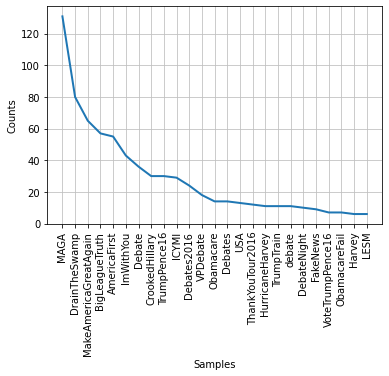

In [17]:
freq_hashtags.plot(25);

### Reflection:

 * What do these hashtags tell you about the nature of Trumps Tweets? 


----
 * What are the common topics? 

## Who is addressed the most in Trump's tweets (via mentions)

Note that, below, the code is looking for the "@" symbol, which is how people are mentioned on Twitter. 

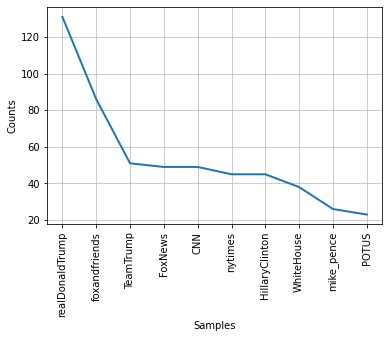

In [18]:
tag_users = re.findall(r"@(\w+)", raw_text)
freq_users = nltk.FreqDist(tag_users)
freq_users.plot(10);

### Reflection:

 * What types of accounts are most frequently mentioned in Trump's tweets? 


## Final Reflection :


 * Based on your analysis of the data from Trump's tweets, what can you say about how Twitter is used? 


----
 * Does this validate or invalidate how you thought about Trump's tweets previously? 


---
# Save notebook, then `File > Close and Halt`